https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [4]:
feature_name_df['column_name'].unique().shape

(477,)

In [6]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index']>1].count()

column_index    42
dtype: int64

In [7]:
feature_dup_df[feature_dup_df['column_index']>1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
f_dup_df = pd.DataFrame(data = feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])

In [12]:
f_dup_df_reset = f_dup_df.reset_index()
f_dup_df_reset

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [13]:
new_feature_name_df = pd.merge(feature_name_df.reset_index(), f_dup_df_reset, how='outer')

In [14]:
new_feature_name_df

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [15]:
new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
new_feature_name_df


,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [39]:
# 앞에 했던것을 함수로 정의


def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [40]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('data/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
     # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

**학습 피쳐 데이터셋 정보**

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [20]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
y_train['action'].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'예측 정확도 : {accuracy}')



예측 정확도 : 0.8547675602307431


In [23]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

**파라미터 튜닝 : GridSearchCV**

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv =5, verbose=1)

grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}')
print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}')


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513444970102249
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


In [28]:
grid_cv.cv_results_

{'mean_fit_time': array([4.23267426, 5.56245413, 5.08817539, 5.6407001 , 7.39198971,
        8.35842042, 6.12277393]),
 'std_fit_time': array([0.38870617, 0.94560204, 1.18210013, 1.43833826, 0.89841629,
        1.25744773, 1.38292171]),
 'mean_score_time': array([0.04048848, 0.02394309, 0.01914887, 0.01934857, 0.02333765,
        0.0243742 , 0.02384605]),
 'std_score_time': array([0.02142372, 0.00362037, 0.00473636, 0.00425971, 0.00439754,
        0.00484026, 0.00989232]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81373215, 0.82053025, 0.79945615, 0.79469748, 0.79945615,
        0.8028552 , 0.7960571 ]),
 'split1_test_score': array([0.87287559, 0.81985044, 0.

In [29]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.232674,0.388706,0.040488,0.021424,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,5.562454,0.945602,0.023943,0.003620,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,5.088175,1.182100,0.019149,0.004736,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,5.640700,1.438338,0.019349,0.004260,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,7.391990,0.898416,0.023338,0.004398,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,8.358420,1.257448,0.024374,0.004840,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,6.122774,1.382922,0.023846,0.009892,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [30]:
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [32]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print(f'max_depth = {depth} 정확도 : {accuracy:.4f}')

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [33]:
params={
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv =5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}')
print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [36]:
best_df_clf = grid_cv.best_estimator_ # 최적의 하이퍼 파라미터를 사용한 결정 트리 객체

pred1 = best_df_clf.predict(X_test)
print(f'결정 트리 예측 정확도 : {accuracy_score(y_test,pred1):.4f}')

결정 트리 예측 정확도 : 0.8717


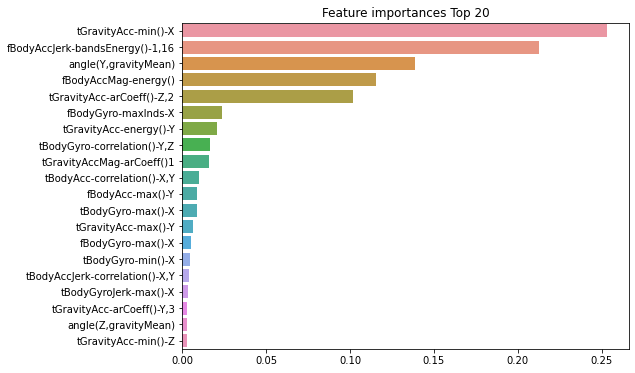

In [38]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_ # 각 피처의 중요도 확인

# top 중요도로 정렬을 쉽게하고, 시본 막대그래프로 표현하기 위해 시리즈로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요값 순으로 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()